In [78]:
import numpy as np
import matplotlib.pyplot as plt

In [79]:
def value_iteration(V: np.ndarray, prob_front):
    prob_back = 1 - prob_front
    
    while True:
        new_V = V.copy()
        for state in range(1, 100):
            action_value_list = []
            for action in range(1, min(state, 100 - state) + 1):
                action_value = 0

                next_state = state + action
                if next_state == 100:
                    action_value += prob_front * 1
                else:
                    action_value += prob_front * V[next_state]

                next_state = state - action
                if next_state == 0:
                    action_value += prob_back * 0
                else:
                    action_value += prob_back * V[next_state]
                
                action_value_list.append(action_value)
            new_V[state] = np.max(action_value_list)
        if np.sum(np.abs(V - new_V)) < 1e-4:
            break
        V = new_V
    return V

In [80]:
def get_policy(V: np.ndarray, prob_front):
    prob_back = 1 - prob_front

    policy = np.zeros(100)
    for state in range(1, 100):
        action_value_list = []
        for action in range(1, min(state, 100 - state) + 1):
            action_value = 0

            # 동전 앞면이 나올 경우
            next_state = state + action
            if next_state == 100:
                action_value += prob_front * 1
            else:
                action_value += prob_front * V[next_state]

            # 동전 뒷면이 나올 경우
            next_state = state - action
            if next_state == 0:
                action_value += 0
            else:
                action_value += prob_back * V[next_state]
            
            action_value_list.append(action_value)
        policy[state] = np.argmax(action_value_list) + 1
    return policy

In [84]:
def draw(V: np.ndarray, policy: np.ndarray):
    fig, ax = plt.subplots(1, 2, figsize=(10, 4))

    ax[0].set_title("Value Function")
    ax[0].set_ylim(0, 1)
    ax[0].plot(range(1, len(V)), V[1:])

    ax[1].set_title("Policy")
    ax[1].set_ylim(0, 50)
    ax[1].bar(range(1, 100), policy[1:100])
    plt.show()

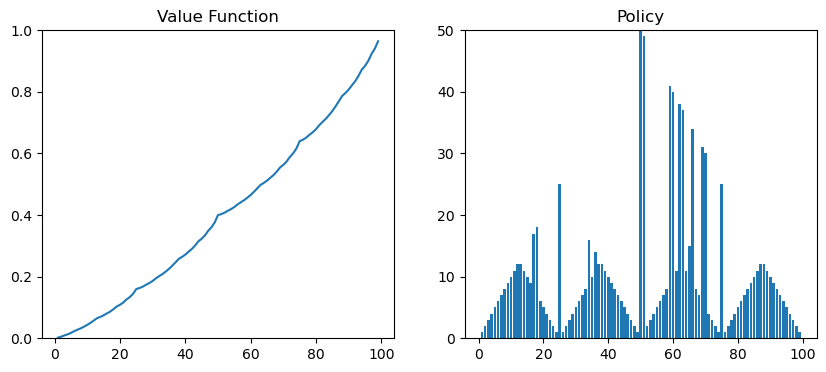

In [85]:
V = np.zeros(100)
V = value_iteration(V, 0.4)
policy = get_policy(V, 0.4)
draw(V, policy)

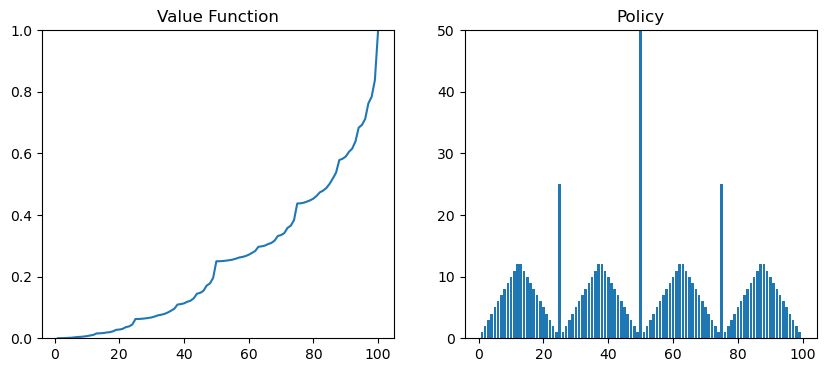

In [86]:
V = np.zeros(101)
V[100] = 1
V = value_iteration(V, 0.25)
policy = get_policy(V, 0.25)
draw(V, policy)

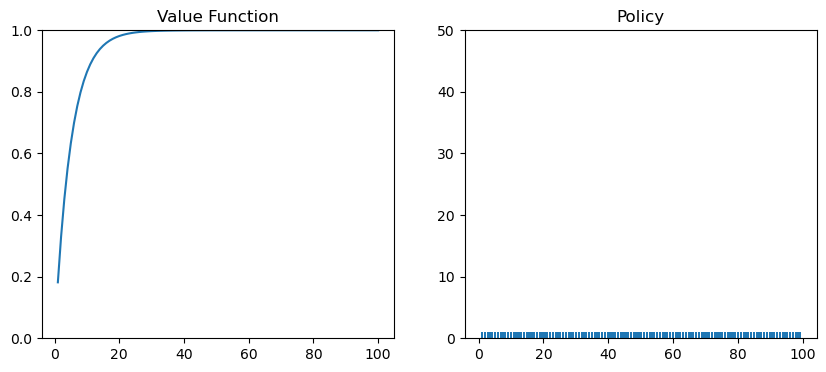

In [87]:
V = np.zeros(101)
V[100] = 1
V = value_iteration(V, 0.55)
policy = get_policy(V, 0.55)
draw(V, policy)